In [11]:
import sys
import os

# Add the path to the DiscEvolution directory
sys.path.append(os.path.abspath("DiscEvolution"))

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from DiscEvolution.disc_winds import DiskWindEvolution
from DiscEvolution.star import SimpleStar
from DiscEvolution.grid import Grid
from DiscEvolution.dust import DustGrowthTwoPop, SingleFluidDrift
from DiscEvolution.eos import EOS_Table

%config InlineBackend.figure_format = 'svg'

In [3]:
def plot_chambers(title = None, **kwargs):

    model = DiskWindEvolution(
    r0 = 1*u.au, # Reference radius in AU
    sigma0 = 3450*u.g / u.cm**2, # Surface density at reference radius, g/cm^2
    T0 = 150 * u.K, # temperature at reference radius, K
    v0 = 30 * u.cm / u.s, # inflow velocity at reference radius, cm/s
    fw = 0, # fraction of v0 caused by disk wind
    K = 0, # controls mass loss rate via disk wind
    Tevap = 1500 * u.K, # Dust evaporation temperature, K
    rexp = 15*u.au, # Initial exponential turnover distance
    k0 = 0.1 * u.cm**2 / u.g, # Dust opacity, cm^2/g
    )

    rmin = kwargs.get('rmin', 0.05)
    rmax = kwargs.get('rmax', 1000)
    npoints = kwargs.get('npoints', 1000)

    star = SimpleStar()
    grid = Grid(rmin, rmax, npoints)

    for key, value in kwargs.items():
        if hasattr(model, key):
            try:
                units = 0*getattr(model,key)
                setattr(model, key, value*units.unit)
            except: setattr(model, key, value)

    fig, ax = plt.subplots(2,2, figsize = (12,8))
    fig.suptitle(title, fontsize = 16)
    plt.subplots_adjust(top=0.95)

    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    for t in [0.01, 0.1, 1, 10] * u.Myr:
    # for t in [0.01] * u.Myr:

        sigma, T, _, _ = model(star, grid.Rc * u.AU, t)
        ax1.loglog(grid.Rc, sigma, label="{}".format(t))
        ax3.loglog(grid.Rc, T, label="{}".format(t))      

    times = np.linspace(0.01, 10, 500)*u.Myr
    Mtots = []
    Maccs = []
    for t in times:
        _, _, Mtot, Macc = model(star, grid.Rc * u.AU, t)
        Mtots.append(Mtot/ u.Msun)
        Maccs.append(Macc * u.yr/u.Msun)

    ax2.loglog(times.to(u.yr) /u.Myr, Mtots)
    ax4.loglog(times.to(u.yr) /u.Myr, Maccs)

    ax1.legend()
    ax1.set_xlabel("R [AU]")
    ax1.set_ylabel(r"Surface Density $\Sigma$")
    ax1.set_ylim(1e-3, 1e5)
    ax1.set_xlim(0.05, 3000)
    ax1.set_xticklabels([])
    ax1.set_xticks([0.1, 1, 10, 100, 1000])
    ax1.set_xticklabels([0.1, 1, 10, 100, 1000])
    ax1.set_yticks([1e-2, 1e0, 1e2, 1e4])

    ax2.set_ylim(0.0005, 0.2)
    ax2.set_xlim(1e4, 1e7)
    ax2.set_ylabel(r"Disk Mass [$M_{\bigodot}$]")
    ax2.set_xlabel("Time [yr]")
    #ax2.set_xticklabels([])
    #ax2.set_xticks([0.1, 1, 10, 100, 1000])
    #ax2.set_xticklabels([0.1, 1, 10, 100, 1000])
    ax2.set_yticks([0.01, 0.010, 0.1])

    ax3.legend()
    ax3.set_xlabel("R [AU]")
    ax3.set_ylabel("Temperature [K]")
    ax3.set_ylim(10, 2500)
    ax3.set_xlim(0, 1000)
    ax3.set_xticklabels([])
    ax3.set_xticks([0.03, 1, 10, 100, 1000])
    ax3.set_xticklabels([0.1, 1, 10, 100, 1000])
    ax3.set_yticks([1e1, 1e2, 1e3])
    ax3.set_yticklabels([10, 100, 1000])

    ax4.set_ylim(5e-13, 1e-6)
    ax4.set_xlim(1e4, 1e7)
    ax4.set_yticks([1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7])
    ax4.set_ylabel(r"Star Accretion $[M_\odot text{ yr}^{-1}]$")
    ax4.set_xlabel("Time (years)")

    fig.show()

/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/3002682433.py:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0, 1000)
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/3002682433.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/3002682433.py:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0, 1000)
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/3002682433.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/3002682433.py:79: UserWarning: Atte

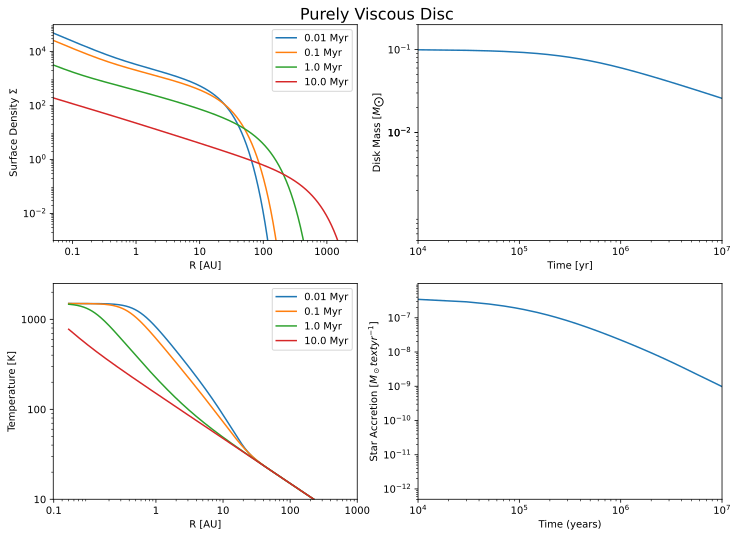

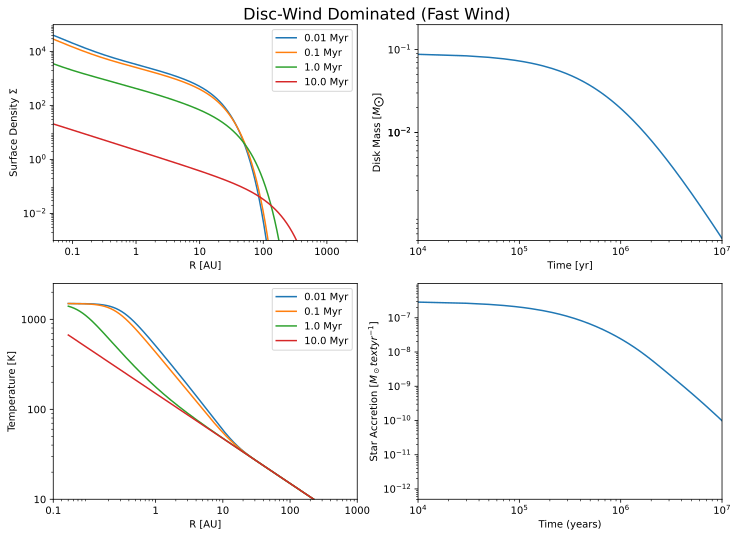

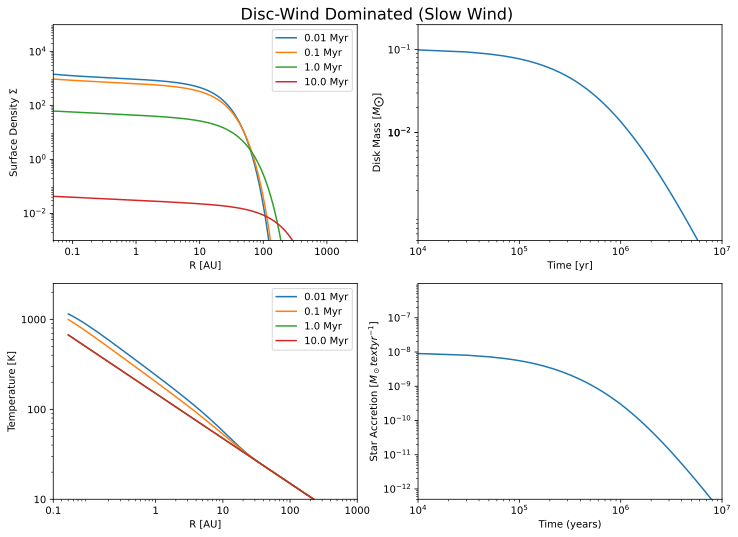

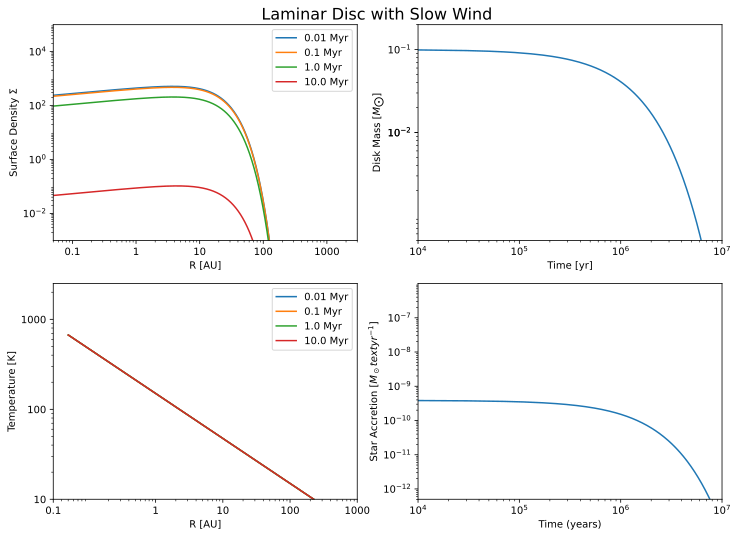

In [4]:
plot_chambers(rmax=2000, npoints=2000, title="Purely Viscous Disc")
plot_chambers(fw=0.8, title = "Disc-Wind Dominated (Fast Wind)")
plot_chambers(fw=0.8, K=1, sigma0=1040, title = "Disc-Wind Dominated (Slow Wind)")
plot_chambers(v0=10, fw=0.99, K=1, sigma0=461, title = "Laminar Disc with Slow Wind")

# Implementing Chambers' Model into the Code

In [5]:
from config import Config, Constants
from DiscEvolution.dust import DustGrowthTwoPop, SingleFluidDrift
from DiscEvolution.eos import EOS_Table

class ChambersEOS(EOS_Table):
    boltz = 1.3806e-16 *u.erg / u.K # boltzmann constant
    mH = 1.67e-24 *u.g # mass of hydrogen atom in grams
    mu = 2.34 
    gamma = 1.4
    sig_SB = 5.6704e-5 * u.erg / u.cm**2 / u.s / u.K**4 # Stefan-Boltzmann constant, cgs
    
    def __init__(self, star, sigma0, r0, T0, v0, fw, K, Tevap, rexp, k0): # tol is no longer used
        super(ChambersEOS, self).__init__()

        self._star = star
        self.sigma0 = sigma0
        self.r0 = r0
        self.T0 = T0
        self.v0 = v0
        self.fw = fw
        self.K = K
        self.Tevap = Tevap
        self.rexp = rexp
        self.k0 = k0

        self._star = star
        
        self._T = None
        self._time = 0

        self.config = Config

    def calculate_T(self, dt, star):
        sig_SB = 5.6704e-5 * u.erg / u.cm**2 / u.s / u.K**4 # Stefan-Boltzmann constant, cgs
        G = 6.67430e-8 * u.cm**3 / (u.g * u.s**2) # Gravitational constant, cgs
        
        dt = ((self._time-dt)/(2*np.pi)) * u.yr

        if star:
            self._star = star
            
        Mstar = self._star.M * u.Msun
        R = self._R * u.AU

        s0 = np.sqrt(self.rexp / self.r0)

        # part of Equation 37
        V = self.Tevap/self.T0

        Atop = 9*(1-self.fw)*G*Mstar*self.k0*(self.sigma0**2)*self.v0
        Abottom = 32*sig_SB*(self.r0**2)*(self.T0**4)
        A = np.sqrt(Atop/Abottom)

        x = (R/self.r0)**(1/2)

        # Equation 39
        p0 = A*(V**(1/2)) * ((A**2 + 1) / (A**2 + V**3))**(1/6)
        J = self.fw / (1-self.fw)
        n = -1 - (2/5) * ((1+J)**2 + 8*J*self.K)**(1/2)
        b = ((1-J)/2) + (1/2) * ((1+J)**2 + 8*J*self.K)**(1/2)
        tau = (8 * self.r0 * s0**(5/2)) / (25 * self.v0 * (1-self.fw))

        # Equation 38
        p1 = p0 * (1 + (dt/tau))**n * (x**b)
        p2 = np.exp((1/s0)**(5/2) - (x/s0)**(5/2)*(1 + dt/tau)**(-1))
        p = p1 * p2

        # Equation 36 
        sigma_1 = (self.sigma0/A) * p * x**(-5/2)
        sigma_2_top = 1 + V**(-2)*p*(x**(-9/2))
        sigma_2_bottom = 1 +p*(x**(-5/2))
        sigma = sigma_1 * (sigma_2_top/sigma_2_bottom)**(1/4)

        # Equation 37 more
        sig = A * sigma / self.sigma0

        # Equation 36 Temperature
        Ttop = sig**2 + 1
        Tbottom = sig**2 + (V**(3))*(x**(3))
        T = self.Tevap * (Ttop/Tbottom)**(1/3)

        # Fixing the units
        self._T = T.decompose().to(u.K)
        self._T = self._T.value
        # print("Temp", np.sum(self._T))
        self._set_arrays()
        return self._T

    def set_grid(self, grid):
        self._R = grid.Rc
        self._T = None

    def update(self, dt, Sigma, amax=1e-5, star=None):
        self._time += dt
        self._T = self.calculate_T(dt, star)
        self._set_arrays()

    def set_grid(self, grid):
        self._R = grid.Rc
        self._T = None

    def _Omega(self, R):
        Omega = self._star.Omega_k(R)
        return Omega
    
    def _calculate_alpha(self):
        cs0_val = ((Constants.gamma)*(Constants.boltz)*Config.T0/(Constants.mu*Constants.mH))**0.5 # sound speed from ideal gas law at ref temp; cs^2=gamma*kt/(mu*mH)
        cs0_val = cs0_val.to(u.cm/u.s)
        Omega_ref = self._star.Omega_k(Config.r0.value) * (2*np.pi) / u.yr # keplerian frequency at reference radius, in proper units given docs of func
        alpha_turb = (1 - Config.fw)*Config.r0*Config.v0*Omega_ref / (cs0_val**2) 
        alpha_wind = Config.fw*Config.v0 / (cs0_val)
        alpha = alpha_turb  + alpha_wind
        alpha_t = alpha.decompose()
        return alpha_t

    def _f_cs(self, R):
        k_B = Constants.boltz
        m_H = Constants.mH
        T = self._T*u.K
        cs = (k_B*T/(Constants.mu*m_H))**0.5
        cs = cs.to(u.AU/u.yr)/(2*np.pi)
        cs = cs.value
        return cs

    def _f_alpha(self, R):
        self._alpha_t = self._calculate_alpha()
        return self._alpha_t
    
    def _f_H(self, R):
        Omega = self._Omega(R)
        _H = self._f_cs(R)/Omega
        return _H
    
    def _f_nu(self, R):
        alpha = self._f_alpha(R)
        H = self._f_H(R)
        Omega = self._Omega(R)
        return alpha*H**2*Omega

    @property
    def T(self):
        return self._T

    @property
    def star(self):
        return self._star

## Setting up simulation

In [13]:
from DiscEvolution.eos import ChambersEOS

def setup_model(**kwargs):
    
    # Class inheritance AccretionDisc > DustyDisc > DustGrowthTwoPop 
    star = SimpleStar()
    init_params = {"sigma0":3450*u.g / u.cm**2 ,
                    "r0":1*u.au, 
                    "T0":150 * u.K, 
                    "v0":30 * u.cm / u.s,
                    "fw":0,
                    "K":0, 
                    "Tevap":1500 * u.K, 
                    "rexp":15*u.au,
                    "k0":0.1 * u.cm**2 / u.g,
                    "rmin":0.05,
                    "rmax":1000,
                    "nr":1000,
                    "initial_frac":0.01}

    for key, value in kwargs.items():
        if key in init_params:
            try:
                # If the current value has units, apply the units to the new value
                current_value = init_params[key]
                units = getattr(current_value, 'unit', None)
                if units:
                    init_params[key] = value * units  # Assign new value with the same units
                else:
                    init_params[key] = value  # Assign new value without units
            except Exception as e:
                print(f"Error updating {key}: {e}")
                init_params[key] = value  # Fallback to assigning the raw value

    if kwargs:
        print("Simulation parameters:", kwargs)

    grid = Grid(init_params['rmin'], init_params['rmax'], init_params['nr'])
    wind = DiskWindEvolution(init_params['sigma0'],init_params['r0'],init_params['T0'],
                             init_params['v0'],init_params['fw'],
                             init_params['K'],init_params['Tevap'],
                             init_params['rexp'],init_params['k0'])

    eos = ChambersEOS(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
                             init_params['v0'],init_params['fw'],
                             init_params['K'],init_params['Tevap'],
                             init_params['rexp'],init_params['k0'])
    eos.set_grid(grid)

    drift = SingleFluidDrift(settling=True)

    Sigma = wind(star, grid.Rc*u.AU, 0*u.yr)[0]
    dust = DustGrowthTwoPop(grid, star, eos, init_params['initial_frac'], Sigma.value, feedback=True)

    return star, grid, wind, eos, drift, dust

## Checking the ChambersEOS temperature is consistent

Simulation parameters: {'fw': 0, 'K': 0}
Simulation parameters: {'fw': 0, 'K': 0}
0.0
Nstep: 1
Time: 0.1 yr
4.067486088966832
8.136010878676156
12.205542596911416
Nstep: 4
Time: 10.0 yr
16.276049820613757
20.347501523004144
24.419867116942687
28.493116494764106
32.5672200647828
36.64214878462391
40.71787419150671
44.79436842958351
48.87160427441911
52.949555154683345
57.02819517112017
61.107499112852295
65.18744247107799
69.26800145021737
73.34915297656859
77.43087470453789
81.51314502051372
85.59594304446085
89.67924862931778
93.76304235828722
97.84730554011709
101.9320202024754
106.01716908352921
Nstep: 27
Time: 100.0 yr
110.10273562184325
114.1887039447183
118.27505885509377
122.36178581714157
126.44887094068042
130.53630096454094
134.62406323901104
138.71214570749117
142.80053688748612
146.88922585105735
150.97820220485647
155.06745606985538
159.15697806088403
163.2467592660806
167.33679122635263
171.4270659149418
175.51757571717675
179.60831341049263
183.6992721447879
187.79044542

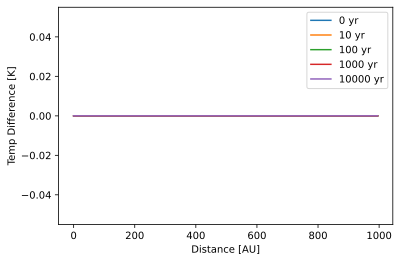

In [41]:
star, grid, wind, eos, drift, dust = setup_model(fw=0,K=0)
star2, grid2, wind2, eos2, drift2, dust2 = setup_model(fw=0,K=0)

times = np.array([0.1, 10, 100, 1000, 10000])*2*np.pi
ts = []

t = 0
n = 0
for ti in times:
    while t < ti:
        dt = 0.5*drift.max_timestep(dust)

        dust.update(dt)
        drift(dt, dust)
        t = np.minimum(t + dt, ti)
        n += 1

        ts.append(dt)
        if (n % 1000) == 0:
            print('Nstep: {}'.format(n))
            print('Time: {} yr'.format(t / (2 * np.pi)))
            print('dt: {} yr'.format(dt / (2 * np.pi)))
    # print((np.sum(ts)-dt)/(2*np.pi))
    Sigma, temps, _, _ = wind2(star2, grid2.Rc*u.AU, (np.sum(ts)-dt)/(2*np.pi)*u.yr)

    diffs = temps - dust.T

    plt.plot(grid.Rc, diffs, label="{} yr".format(round(t / (2*np.pi))))
    # plt.loglog(grid.Rc, temps, label="{} yr".format(round(t / (2*np.pi))))
    # plt.loglog(grid.Rc, dust.T, label="{} yr".format(round(t / (2*np.pi))))

    plt.ylabel("Temp Difference [K]")
    plt.xlabel("Distance [AU]")
    print('Nstep: {}'.format(n))
    print('Time: {} yr'.format(t / (2 * np.pi)))
    
plt.legend()

plt.legend()
plt.show()

Simulation parameters: {'rmax': 2000, 'nr': 2000, 'fw': 0, 'sigma0': 3450, 'v0': 30}
Simulation parameters: {'rmax': 2000, 'nr': 2000, 'fw': 0.8, 'sigma0': 3450, 'v0': 30}
Simulation parameters: {'rmax': 2000, 'nr': 2000, 'fw': 0.8, 'K': 1, 'sigma0': 1040, 'v0': 30}
Simulation parameters: {'rmax': 2000, 'nr': 2000, 'v0': 10, 'fw': 0.99, 'K': 1, 'sigma0': 461}


/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_16034/2703013561.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog(grid.Rc, dust.Sigma_G, color = colours[n], label = str(t/1e6)+" Myr")
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_16034/2703013561.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog(grid.Rc, dust.Sigma_G, color = colours[n], label = str(t/1e6)+" Myr")
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_16034/2703013561.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog(grid.Rc, dust.Sigma_G, color = colours[n], label = str(t/1e6)+" Myr")
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_16034/2703013561.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog(grid.Rc, dust.Sigma_G, color = colours[n], label = str(t/1e6)+" Myr")


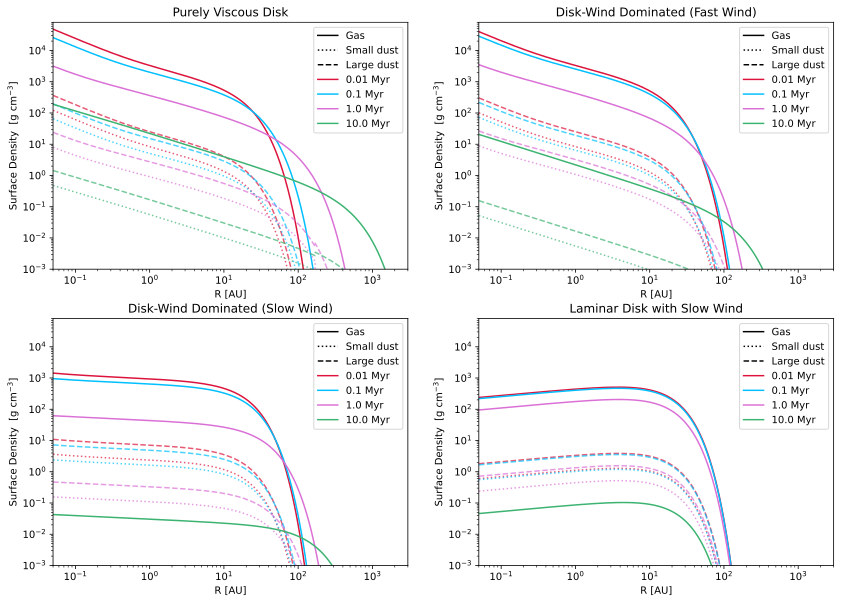

In [14]:
fig, ax = plt.subplots(2,2, figsize = (14,10))
ax1, ax2, ax3, ax4 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]
ax = [ax1, ax2, ax3, ax4]
colours = ['crimson', 'deepskyblue', 'orchid', 'mediumseagreen']
times = np.array([0.01, 0.1, 1, 10])*1e6
# times = np.array([0.01, 0.1, 1])*(2*np.pi)*1e6
args = [{"fw": 0, "sigma0":3450, "v0":30},
        {"fw":0.8, "sigma0":3450, "v0":30},
        {"fw":0.8, "K":1, "sigma0":1040, "v0":30},
        {"v0":10, "fw":0.99, "K":1, "sigma0":461}]
titles = ["Purely Viscous Disk", "Disk-Wind Dominated (Fast Wind)",
          "Disk-Wind Dominated (Slow Wind)",
          "Laminar Disk with Slow Wind"]
n2=0
# star, grid, wind, eos, drift, dust = setup_model(**kwargs)

for axis, kwargs in zip(ax, args):
    star, grid, wind, eos, drift, dust = setup_model(rmax=2000,nr=2000,**kwargs)
    n=0
    axis.plot(grid.Rc, 0*grid.Rc, '-', color='black',label="Gas")
    axis.plot(grid.Rc, 0*grid.Rc, linestyle="dotted", color='black',label="Small dust")
    axis.plot(grid.Rc, 0*grid.Rc, linestyle="dashed", color='black',label="Large dust")
    axis.set_title(titles[n2])
    for t in times:
        Sigma_new = wind(dust.star, dust.R*u.AU, t*u.yr)[0]
        dust.set_surface_density(Sigma_new.value)
        # dust.update(t)
        axis.loglog(grid.Rc, dust.Sigma_G, color = colours[n], label = str(t/1e6)+" Myr")
        axis.loglog(grid.Rc, dust.Sigma_D[0], linestyle='dotted', color = colours[n], alpha=0.7)
        axis.loglog(grid.Rc, dust.Sigma_D[1], linestyle='dashed', color = colours[n], alpha=0.7)
        # axis.set_title(titles[n])
        axis.legend()
        n+=1
    n2+=1
    axis.set_xlim(0.05, 3000)
    axis.set_ylim(1e-3, 8e4)
    axis.set_xlabel("R [AU]")
    axis.set_ylabel("Surface Density  [g cm$^{-3}$]")

## Evolving the dust using Chambers' model

Simulation parameters: {'fw': 0.8, 'K': 1, 'sigma0': 3450, 'v0': 30}
Nstep: 1000
Time: 4133.824742915803 yr
dt: 4.135797644327162 yr
Nstep: 2000
Time: 8279.77302117257 yr
dt: 4.160801556111181 yr
Nstep: 3000
Time: 12461.542647176759 yr
dt: 4.190693712476551 yr
Nstep: 4000
Time: 16650.28610486982 yr
dt: 4.191571142199565 yr
Nstep: 5000
Time: 20854.184622525205 yr
dt: 4.2209350861109565 yr
Nstep: 6000
Time: 25094.06733837619 yr
dt: 4.243532490343189 yr
Nstep: 7000
Time: 29337.727933289436 yr
dt: 4.24854307670203 yr
Nstep: 8000
Time: 33600.64094573392 yr
dt: 4.281990583594662 yr
Nstep: 9000
Time: 37898.21759299655 yr
dt: 4.297793435252964 yr
Nstep: 10000
Time: 42198.056854377 yr
dt: 4.306619635359194 yr
Nstep: 11000
Time: 46520.93670845903 yr
dt: 4.343847895033628 yr
Nstep: 12000
Time: 50876.00571165565 yr
dt: 4.353365461502191 yr
Nstep: 13000
Time: 55233.17436903222 yr
dt: 4.365690097987283 yr
Nstep: 14000
Time: 59616.86187398551 yr
dt: 4.406394109191008 yr
Nstep: 15000
Time: 64029.42538

/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4A/PHYS 437A/DiscEvolution/DiscEvolution/DiscEvolution/dust.py:359: RuntimeWarning: overflow encountered in exp
  amax = np.minimum(a0, a*np.exp(dt/t_grow))  # If dust grains start small (default) first have to grow)


Nstep: 40000
Time: 180723.23515313133 yr
dt: 4.9283689511799516 yr
Nstep: 41000
Time: 185674.57196028586 yr
dt: 4.961589837351941 yr
Nstep: 42000
Time: 190634.7375605954 yr
dt: 4.963449959396982 yr
Nstep: 43000
Time: 195610.8347831767 yr
dt: 4.993378147956205 yr
Nstep: 44000
Time: 200627.3572681886 yr
dt: 5.026953659987497 yr
Nstep: 45000
Time: 205652.9158109518 yr
dt: 5.0288655927225525 yr
Nstep: 46000
Time: 210694.43851639377 yr
dt: 5.058806546918123 yr
Nstep: 47000
Time: 215776.68119780184 yr
dt: 5.093393548381115 yr
Nstep: 48000
Time: 220868.54612237812 yr
dt: 5.095033511271755 yr
Nstep: 49000
Time: 225976.08589461006 yr
dt: 5.124665799509956 yr
Nstep: 50000
Time: 231124.5599397247 yr
dt: 5.160934215450215 yr
Nstep: 51000
Time: 236283.66886450176 yr
dt: 5.16197740330061 yr
Nstep: 52000
Time: 241457.84062699162 yr
dt: 5.190978998044514 yr
Nstep: 53000
Time: 246673.00979996726 yr
dt: 5.229612145262492 yr
Nstep: 54000
Time: 251900.33614935522 yr
dt: 5.229732490713285 yr
Nstep: 55000
T

/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_23311/1618177085.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(grid.Rc, dust.Sigma, label = format_time_label(t), color=colours[n2])


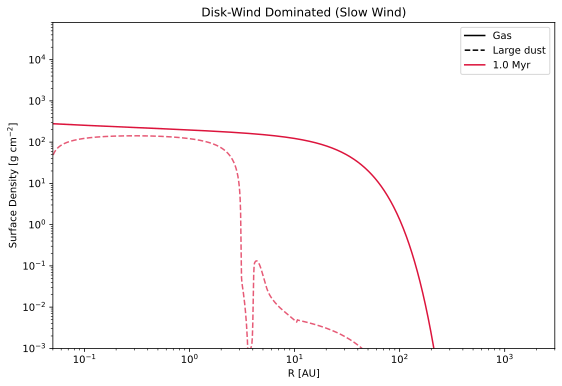

In [136]:
def format_time_label(t):
    if t < 1e6:  # Less than 1 million seconds (0.1 Myr)
        return "{:.1f} Myr".format(t / (1e6 * 2 * np.pi))
    else:
        return "{} Myr".format(np.round(t / (1e6 * 2 * np.pi)))

fig, ax = plt.subplots(1,1, figsize=(9,6))

times = np.array([0.1,1])*1e6*2*np.pi
# ts = []

args = [{"fw": 0, "K":0, "sigma0":3450, "v0":30},
        {"fw":0.8, "sigma0":3450, "v0":30},
        {"fw":0.8, "K":1, "sigma0":3450, "v0":30},
        {"v0":10, "fw":0.99, "K":1, "sigma0":461}]

titles = ["Purely Viscous Disk", "Disk-Wind Dominated (Fast Wind)",
          "Disk-Wind Dominated (Slow Wind)",
          "Laminar Disk with Slow Wind"]

colours = ['crimson', 'deepskyblue', 'orchid', 'mediumseagreen']

index=2

ax.plot(grid.Rc, 0*grid.Rc, '-', color='black',label="Gas")
# ax.plot(grid.Rc, 0*grid.Rc, linestyle="dotted", color='black',label="Small dust")
ax.plot(grid.Rc, 0*grid.Rc, linestyle="dashed", color='black',label="Large dust")
ax.set_title(titles[index])

star, grid, wind, eos, drift, dust = setup_model(**args[index])

t = 0
n = 0
n2 = 0
for ti in times:
    while t < ti:
        dt = 0.5*drift.max_timestep(dust)
        # ts.append(dt)

        # print((np.sum(ts)-dt)/(2*np.pi))

        Sigma_new, T,_,_ = wind(star, grid.Rc*u.AU, t/(2*np.pi)*u.yr)
        dust.set_surface_density(Sigma_new)
        dust.update(dt)
        # dust.set_surface_density(Sigma_new)

        drift(dt, dust)
        t = np.minimum(t + dt, ti)
        n += 1

        if (n % 1000) == 0:
            print('Nstep: {}'.format(n))
            print('Time: {} yr'.format(t / (2 * np.pi)))
            print('dt: {} yr'.format(dt / (2 * np.pi)))

    print('Nstep: {}'.format(n))
    print('Time: {} yr'.format(t / (2 * np.pi)))

ax.loglog(grid.Rc, dust.Sigma, label = format_time_label(t), color=colours[n2])
# ax.loglog(grid.Rc, dust.Sigma_D[0], linestyle = "dotted", color=colours[n2], alpha=0.7)
ax.loglog(grid.Rc, dust.Sigma_D[1], linestyle = "dashed", color=colours[n2], alpha=0.7)
n2+=1

ax.set_xlabel("R [AU]")
ax.set_ylabel("Surface Density [g cm$^{-2}$]")
ax.legend()
ax.set_xlim(0.05,3000)
ax.set_ylim(1e-3,8e4)
plt.show()

(0.001, 100000.0)

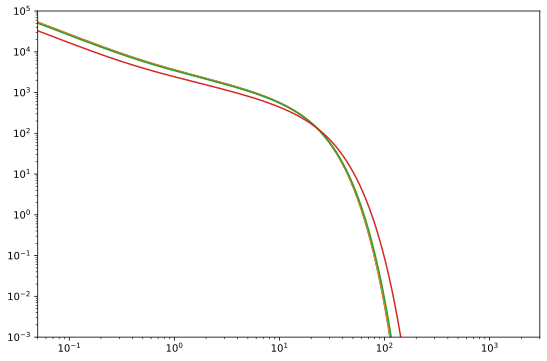

In [83]:
star, grid, wind, eos, drift, dust = setup_model()
fig, ax = plt.subplots(1,1, figsize=(9,6))

for t in np.array([10, 100, 1000, 10000])*(2*np.pi)*u.yr:
    Sigma, T, _,_= wind(star, grid.Rc*u.AU, t)
    # ax.loglog(grid.Rc, T)
    ax.loglog(grid.Rc, Sigma)
ax.set_xlim(0.05,3000)
ax.set_ylim(1e-3,1e5)
plt.show()